Kobi Mazuz 206239568
Dolev Nahmias 207330176

Q1: Read the file, drop nan values and show the first three rows.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
url = "https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv"
nba_df_raw = pd.read_csv(url)
nba_df_raw = nba_df_raw.dropna().reset_index()
nba_df = nba_df_raw[['Age', 'Height', 'Weight', 'Salary']]
nba_df.head(3)

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
2,22.0,6-5,185.0,1148640.0


Q2: Change the columns values to proper form if needed to start working on the data, show the first three rows again after the change.
The goal in this task is to predict the salary based on the age, height and weight of the player.
First we run each column to see its type, we found that the column 'Height' is of type object and thats a problem, we want it to be a float type so we changed it from 'Feet-inch' to cm for a good proprtion(MKS units).

In [2]:
pd.options.mode.chained_assignment = None
nba_df[['Feet','Inch']] = nba_df.Height.str.split("-",expand=True)
nba_df['Height_CM'] = nba_df['Feet'].astype('float')*30.48+nba_df['Inch'].astype('float')*2.54
nba_df.drop(['Feet', 'Inch', 'Height'],axis=1,inplace=True)
nba_df.head(3)

,Age,Weight,Salary,Height_CM
0,25.0,180.0,7730337.0,187.96
1,25.0,235.0,6796117.0,198.12
2,22.0,185.0,1148640.0,195.58


Q3: create a countplot and pieplot of the column 'Position' and explain which one shows the data better in your opinion.
each plot has it's own advantages, if you want to show the spread of the categories the pieplot is better and if you want to show the amount of players playing each position the countplot is better.
in our opinion the countplot is better in our case becuase it's more visual when we have more than two-three categories(in our case we have five).

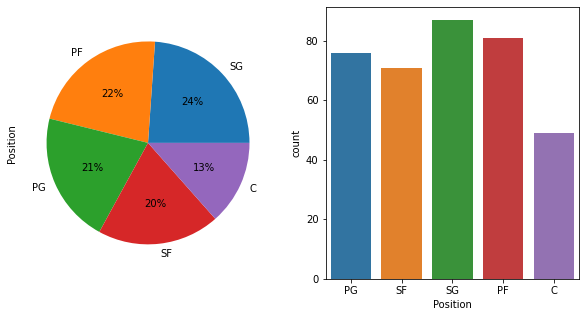

In [3]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
nba_df_raw['Position'].value_counts().plot.pie(ax=axes[0],autopct='%1.0f%%')
sns.countplot(ax=axes[1],x="Position",data=nba_df_raw)

Q4: Split the data so 30% will be used for test and 70% will be used for practice.
show the first 5 rows of the features for practice and the first 5 rows of the label/target for test.

In [4]:
features = ['Age', 'Height_CM', 'Weight']
x = nba_df[features]
y = nba_df['Salary']

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

display(x_train.head())
display(pd.DataFrame(y_test).head())

,Age,Height_CM,Weight
268,22.0,200.66,232.0
232,26.0,198.12,220.0
157,26.0,190.50,208.0
19,21.0,210.82,200.0
147,33.0,205.74,245.0


,Salary
193,2085671.0
33,1636842.0
15,6300000.0
347,3075880.0
57,3553917.0


Q5: Fit a model to the training, explain the model and the reason to choose it specifically. (choose one of the decision trees we learned in class).
We chose the regression tree model because it fits best our prediction goal because it is numeric and not catergorial.

In [5]:
model1 = sk.tree.DecisionTreeRegressor(random_state=42)
model1 = model1.fit(x_train,y_train)

In [6]:
def eval(x,y,model):
    pred=model.predict(x)
    print("The Salary-Prediction MSE is "+str(mean_squared_error(y,pred,squared=False)))
eval(x_test,y_test,model1)

The Salary-Prediction MSE is 6988757.179590477


Q7: add the column position(handle it if need before) and check if the accuaracy of the prediction is improved.
The MSE of the new prediction is lower so the prediction is more accuarate.

In [7]:
pos_dum = pd.get_dummies(nba_df_raw['Position'])
for i in pos_dum.columns:
    x[i] = pos_dum[i].values
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x,y,test_size=0.3,random_state=42)
model2 = sk.tree.DecisionTreeRegressor(random_state=42)
model2 = model2.fit(x_train,y_train)
eval(x_test,y_test,model2)

The Salary-Prediction MSE is 6312848.190643734


Q8: Improve the model by limit the tree depth.(no functions needed, it's ok to try and check which depth is better).

In [15]:
model3 = sk.tree.DecisionTreeRegressor(random_state=42,max_depth=3)
model3 = model3.fit(x_train,y_train)
eval(x_test,y_test,model3)

The Salary-Prediction MSE is 4645313.301755858


The best max_depth for the tree is 3.